<a href="https://colab.research.google.com/github/ErfanNourian/CNN_image_classification/blob/main/DL_Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import os
import PIL
import pathlib
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
import re
import pandas as pd
import shutil
import zipfile
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from keras import backend as K
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from tensorflow.keras.callbacks import LearningRateScheduler


from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
import cv2
import zipfile
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
# Upload files
#uploaded = files.upload()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
zip_file_path = '/content/drive/MyDrive/brain_tumor_dataset.zip'
extract_to = 'extracted_file'
def extract_zip(zip_file_path, extract_to):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
extract_zip(zip_file_path, extract_to)

In [107]:
data_dir = pathlib.Path('/content/extracted_file/brain_tumor_dataset').with_suffix('')
images = (list(data_dir.glob('*/*')))
random.shuffle(images)



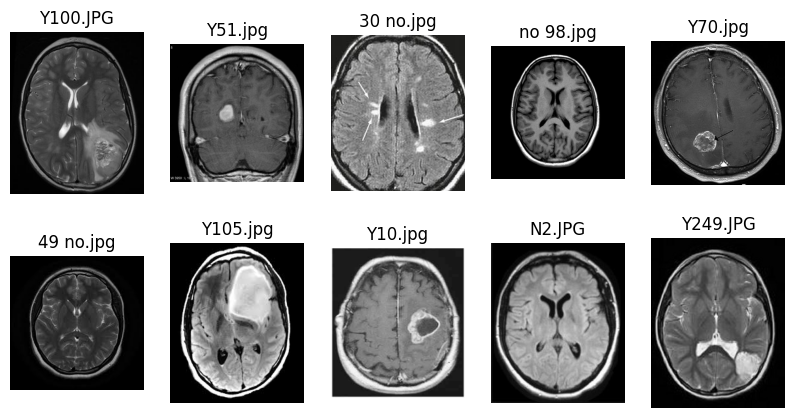

In [108]:
# Demonstration
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(PIL.Image.open(images[i]).convert('RGB'))
    plt.title(str(images[i]).split("/")[-1])
    plt.axis('off')


In [109]:
dimensions = []
for image in images:
  with PIL.Image.open(image) as img:
    dimensions.append(list(img.size))


In [110]:
dimensions = np.array(dimensions)
dimensions.shape

(253, 2)

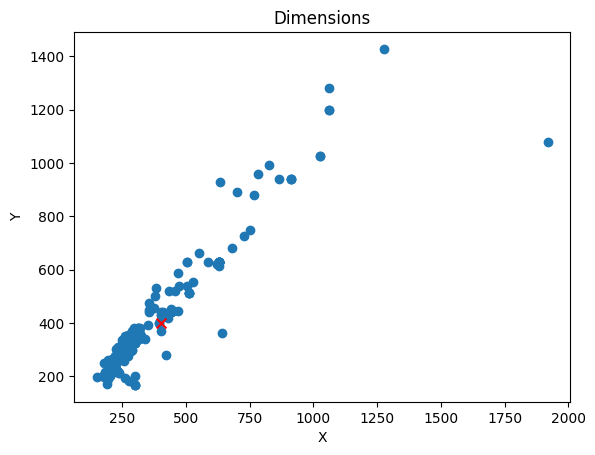

In [111]:
# Scatter dimentions
x = dimensions[:, 0]
y = dimensions[:, 1]
target_width = 400
target_height = 400
plt.scatter(x, y)
plt.scatter(target_width, target_height, color='red', marker='x', s=50, label='Specific Point')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Dimensions')
plt.show()

In [112]:
def add_padding(images):
  padded_img, labels = [], []

  for image in images:
    with PIL.Image.open(image) as img:
      img_width, img_height = img.size

      width_ratio = target_width / img_width
      height_ratio = target_height / img_height

      ratio = min(width_ratio, height_ratio)

      new_width = int(img_width * ratio)
      new_height = int(img_height * ratio)

      resized_img = img.resize((new_width, new_height), PIL.Image.NEAREST)
      letterbox_img = PIL.Image.new('L', (target_width, target_height))

      left_offset = (target_width - new_width) // 2
      top_offset = (target_height - new_height) // 2

      letterbox_img.paste(resized_img, (left_offset, top_offset))
      padded_img.append(((letterbox_img.convert('L'))))

      if len(re.findall(".*y.*|.*Y.*", str(image).split("/")[-1])) != 0:
        labels.append(1) #YES
      else:
        labels.append(0) #NO
  padded_img = np.reshape(padded_img, (-1, 400, 400))
  labels = np.array(labels)
  return padded_img, labels

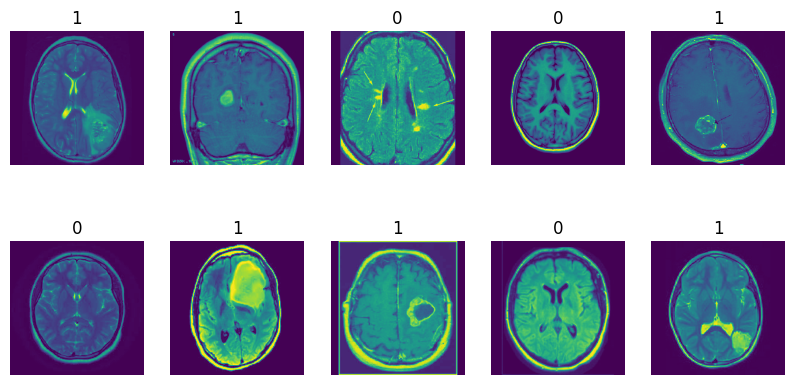

In [113]:
padded_img, labels = add_padding(images)
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(padded_img[i])
    plt.title(labels[i])
    plt.axis('off')

In [114]:
X_train, X_test, y_train, y_test = train_test_split(padded_img, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [115]:
print('X_train: \n',X_train)
print('y_train: \n',y_train)

X_train: 
 [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[4 4 4 ... 4 4 4]
  [4 4 4 ... 4 4 4]
  [4 4 4 ... 4 4 4]
  ...
  [4 4 4 ... 4 4 4]
  [4 4 4 ... 4 4 4]
  [4 4 4 ... 4 4 4]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
y_train: 
 [1 1 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1
 1 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0
 0 0 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1

In [116]:
def res_block(x, filters):
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1), activation='relu')(x)
  fx = layers.BatchNormalization()(fx)
  fx = layers.Conv2D(filters, (3,3), padding='same', strides=(1,1))(fx)
  #fx = layers.BatchNormalization()(fx)
  out = layers.Add()([x, fx])
  out = layers.Activation('relu')(out)
  out = layers.BatchNormalization()(out)
  return out

In [117]:
x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)
y = layers.Conv2D(8, (3,3), padding='same')(x)
y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
y = layers.Conv2D(16, (3,3), padding='same')(y)
y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
y = layers.Conv2D(32, (3,3), padding='same')(y)
y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
y = res_block(y, 32)
y = layers.Flatten()(y)
y = layers.Dense(100, activation='relu')(y)
y = layers.Dense(1, activation='sigmoid')(y)

model_1 = tf.keras.Model(x,y)
model_1._name = 'Model_1'

model_1.summary()

Model: "Model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d_10 (Conv2D)          (None, 400, 400, 8)          80        ['input_3[0][0]']             
                                                                                                  
 max_pooling2d_6 (MaxPoolin  (None, 200, 200, 8)          0         ['conv2d_10[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_11 (Conv2D)          (None, 200, 200, 16)         1168      ['max_pooling2d_6[0][0]'

In [118]:
model_1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

In [119]:
epochs = 30
history = model_1.fit(x = X_train, y = y_train,
                    epochs = epochs,
                    validation_data = (X_val, y_val))

Epoch 1/30
6/6 [==============================] - 20s 3s/step - loss: 8.7712 - accuracy: 0.6497 - val_loss: 13.0537 - val_accuracy: 0.7895
Epoch 2/30
6/6 [==============================] - 16s 3s/step - loss: 1.4054 - accuracy: 0.8362 - val_loss: 13.2766 - val_accuracy: 0.7105
Epoch 3/30
6/6 [==============================] - 16s 3s/step - loss: 0.8216 - accuracy: 0.9040 - val_loss: 11.3167 - val_accuracy: 0.6842
Epoch 4/30
6/6 [==============================] - 16s 3s/step - loss: 0.2524 - accuracy: 0.9153 - val_loss: 17.6059 - val_accuracy: 0.6842
Epoch 5/30
6/6 [==============================] - 20s 3s/step - loss: 0.4558 - accuracy: 0.9379 - val_loss: 11.7005 - val_accuracy: 0.7368
Epoch 6/30
6/6 [==============================] - 16s 3s/step - loss: 0.1071 - accuracy: 0.9435 - val_loss: 10.7310 - val_accuracy: 0.7368
Epoch 7/30
6/6 [==============================] - 16s 3s/step - loss: 0.0203 - accuracy: 0.9887 - val_loss: 11.5281 - val_accuracy: 0.7105
Epoch 8/30
6/6 [===========

In [129]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [121]:
pred_prob = model_1.predict(X_test)
y_pred = np.where(pred_prob > 0.5, 1, 0)

2/2 [==============================] - 1s 137ms/step


Overall Accuracy: 0.868421052631579
Precision: 0.8888888888888888
Recall: 0.9230769230769231
F1-Score: 0.9056603773584906


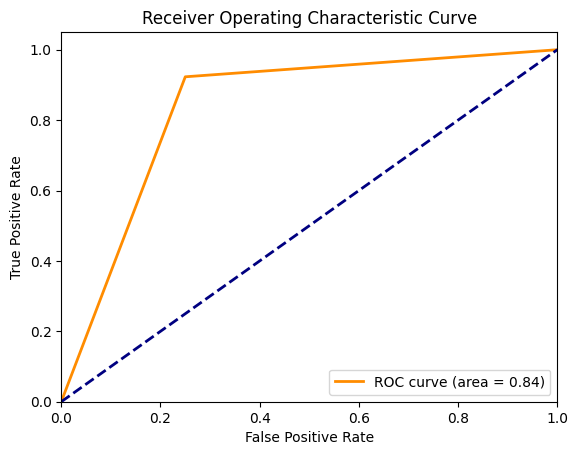

In [122]:
# Compute overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
#del model
del history
K.clear_session()

In [123]:
x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)
y = layers.Conv2D(8, (3,3), padding='same')(x)
y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
y = layers.Conv2D(16, (3,3), padding='same')(y)
y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
y = layers.Conv2D(32, (3,3), padding='same')(y)
y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
y = res_block(y, 32)
y = layers.Flatten()(y)
y = layers.Dense(100, activation='relu')(y)
y = layers.Dense(1, activation='sigmoid')(y)

model_2 = tf.keras.Model(x,y)
model_2._name = 'Model_2'

model_2.summary()

Model: "Model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 400, 400, 8)          80        ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 200, 200, 8)          0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 200, 200, 16)         1168      ['max_pooling2d[0][0]'] 

In [124]:
model_2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

In [125]:
def cosine_annealing(epoch):
  min_lr = 0.001
  max_lr = 0.1
  T_max = 10
  lr = min_lr + 0.5 * (max_lr - min_lr) * (1 + np.cos(epoch * np.pi / T_max))
  return lr

lr_scheduler = LearningRateScheduler(cosine_annealing)

In [126]:
history = model_2.fit(x = X_train, y = y_train,
                    epochs = epochs,
                    validation_data = (X_val, y_val),
                    callbacks=[lr_scheduler])

Epoch 1/30
6/6 [==============================] - 18s 3s/step - loss: 1237.0320 - accuracy: 0.6102 - val_loss: 14218.4375 - val_accuracy: 0.6579 - lr: 0.1000
Epoch 2/30
6/6 [==============================] - 16s 3s/step - loss: 41.3638 - accuracy: 0.5819 - val_loss: 8203.2070 - val_accuracy: 0.6579 - lr: 0.0976
Epoch 3/30
6/6 [==============================] - 17s 3s/step - loss: 4.0011 - accuracy: 0.5763 - val_loss: 2058.0032 - val_accuracy: 0.6579 - lr: 0.0905
Epoch 4/30
6/6 [==============================] - 16s 3s/step - loss: 0.6697 - accuracy: 0.5932 - val_loss: 812.7441 - val_accuracy: 0.6316 - lr: 0.0796
Epoch 5/30
6/6 [==============================] - 16s 3s/step - loss: 0.6643 - accuracy: 0.5932 - val_loss: 474.6393 - val_accuracy: 0.5263 - lr: 0.0658
Epoch 6/30
6/6 [==============================] - 16s 3s/step - loss: 0.6673 - accuracy: 0.5932 - val_loss: 336.3901 - val_accuracy: 0.5789 - lr: 0.0505
Epoch 7/30
6/6 [==============================] - 16s 3s/step - loss: 0.66

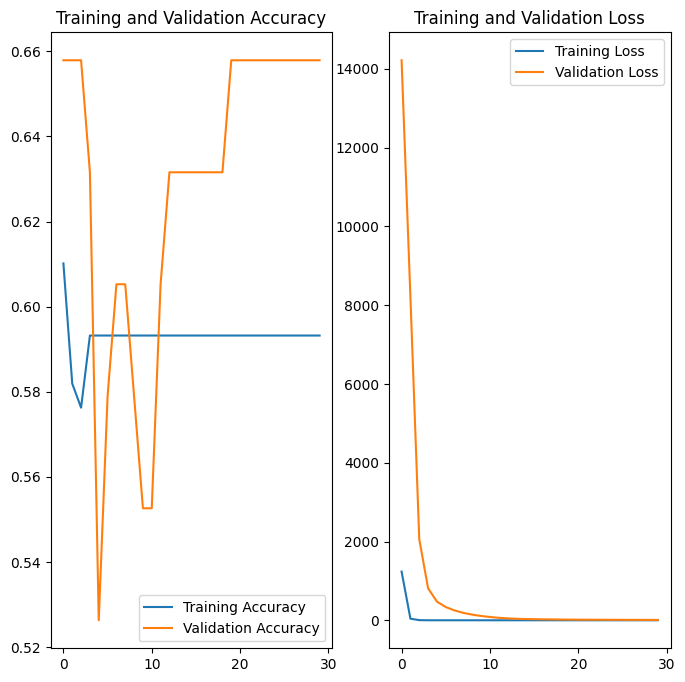

In [127]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2/2 [==============================] - 1s 145ms/step
Overall Accuracy: 0.6578947368421053
Precision: 0.6756756756756757
Recall: 0.9615384615384616
F1-Score: 0.7936507936507937


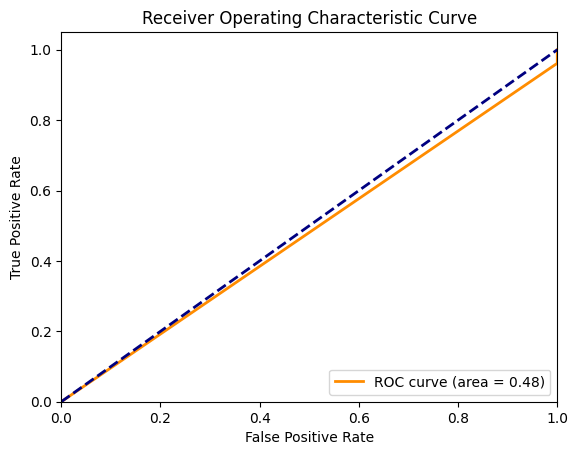

In [128]:
pred_prob = model_2.predict(X_test)
y_pred = np.where(pred_prob > 0.5, 1, 0)

# Compute overall accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Overall Accuracy:", accuracy)

# Compute precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Compute recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Compute F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()
del model_2
del history
K.clear_session()

In [130]:
x = layers.Input(shape=(target_height, target_width, 1)) #input_shape = (height, width, channel)
y = layers.DepthwiseConv2D(3, strides=(1,1), padding='valid', depth_multiplier=1)(x)
y = layers.Conv2D(8, (3,3), padding='same')(x)
y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
y = layers.Conv2D(16, (3,3), padding='same')(y)
y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
y = layers.Conv2D(32, (3,3), padding='same')(y)
y = layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(y)
y = res_block(y, 32)
y = layers.Flatten()(y)
y = layers.Dense(100, activation='relu')(y)
y = layers.Dense(1, activation='sigmoid')(y)

model_3 = tf.keras.Model(x,y)
model_3._name = 'Model_3'

model_3.summary()

Model: "Model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 400, 400, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 400, 400, 8)          80        ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 200, 200, 8)          0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 200, 200, 16)         1168      ['max_pooling2d[0][0]'] 

In [131]:
model_3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

In [132]:
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    min_lr=0.0
  )

In [133]:
history = model_3.fit(x = X_train, y = y_train,
                    epochs = epochs,
                    validation_data = (X_val, y_val),
                    callbacks=[lr_scheduler])

Epoch 1/30
6/6 [==============================] - 22s 3s/step - loss: 15.7212 - accuracy: 0.6045 - val_loss: 68.4044 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 2/30
6/6 [==============================] - 16s 3s/step - loss: 2.8828 - accuracy: 0.7175 - val_loss: 27.8085 - val_accuracy: 0.7632 - lr: 0.0010
Epoch 3/30
6/6 [==============================] - 16s 3s/step - loss: 0.5580 - accuracy: 0.7232 - val_loss: 22.8923 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 4/30
6/6 [==============================] - 17s 3s/step - loss: 0.3003 - accuracy: 0.8362 - val_loss: 22.7424 - val_accuracy: 0.6579 - lr: 0.0010
Epoch 5/30
6/6 [==============================] - 16s 3s/step - loss: 0.2728 - accuracy: 0.8362 - val_loss: 20.9969 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 6/30
6/6 [==============================] - 18s 3s/step - loss: 0.1758 - accuracy: 0.9096 - val_loss: 19.7883 - val_accuracy: 0.7105 - lr: 0.0010
Epoch 7/30
6/6 [==============================] - 17s 3s/step - loss: 0.1273 - accuracy